# Catch-Neuter-Release: Controlling Urban Feral Cat Populations

I like cats. You probably like cats. You know who doesn't like cats? Songbirds. I see a lot of songbirds around Ann Arbor. I don't see a lot of wild cats. I'm from Southern California. In my home town there's a lot of outdoor pet cats, and a handful of feral ones. Not so many songbirds.

## What do we do about it?

Not much. There's a lot of options, but the reality is that humans created this problem 10s of thousands of years ago and it's a hard problem for us to solve. It's a harder problem for the songbirds, and they can't do a thing about it. Some solutions of varying palatability:
* Euthanasia ( 😿 )
* No-kill shelters, adoption ( 😻 )
* Catch-Neuter-Release ( 😾 - 🙀 - 😼 )

## Catch-Neuter-Release

Catch cats. Neuter/spay them. Release them back into the "wild". Is this a solution? Not in the short term. Cats still hunt even if they're neutered, and they even hunt for pleasure. But it makes people feel better because 1) no one's murdering kittens 2) they don't have to take care of the cats.

## Is it a long-term solution?

Can a long term CNR program control or destroy a feral cat population?
Lets "build" a simple logistical model and ~find out~. Or make an educated but possibly wrong guess.

Some sources for information on CNR and feral cat populations:
1. https://www.animallaw.info/article/detailed-discussion-feral-cat-population-control
2. https://abcbirds.org/program/cats-indoors/learn-more/
3. http://www.hshv.org/site/PageNavigator/services/tnr.html
4. http://www.humanesociety.org/issues/feral_cats/qa/feral_cat_FAQs.html?referrer=http://www.hshv.org/site/PageNavigator/services/feral_cat_resources.html
5. http://www.pbs.org/newshour/bb/why-activists-are-fighting-over-feral-felines-2/

# Cat populations over time.
## Birth-only model

In [19]:
t = 52*1 # 52 weeks * years
n0 = 100 # initial cat population
nl = 1.5 # number of litters per year
nk = 3 # number of kittens per litter who survive to adulthood
nc = nk * nl / 52 # number of new cats each pregnant cat produces every week

N = [n0] # list of cat population every week
W = [1] # week index
for i in range(t):
    np = N[i]/2 # number of pregnant cats this week
    nb = int(np * nc) # integer number of cats born
    dN = nb # number of new cats this week
    N.append(N[i] + dN)
    W.append(W[i] + 1)
    
# print(N)

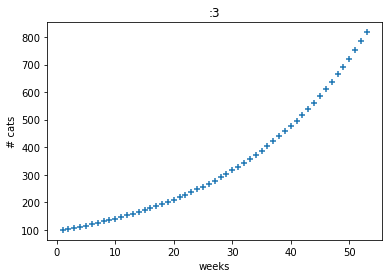

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(W,N ,marker='+')
axes.set_xlabel('weeks')
axes.set_ylabel('# cats')
axes.set_title(':3')

plt.show()

## Death
We introduce a small death rate. In a fecund (many offspring per pregnant adult) population young members will dominate, and the percent of the population which is dying will be small if assume an ample food supply.

In [9]:
t = 52*1 # 52 weeks * years
n0 = 100 # initial cat population
nl = 1.5 # number of litters per year
nk = 3 # number of kittens per litter who survive to adulthood
nc = nk * nl / 52 # number of new cats each pregnant cat produces every week

rd = .03 # percent of cats which die every year

N = [n0] # list of cat population every week
W = [1] # week index
for i in range(t):
    np = N[i]/2 # number of pregnant cats this week
    nb = int(np * nc) # integer number of cats born
    nd = int(rd * N[i]) # integer number of cats which died this week
    dN = nb - nd # number of new cats this week
    N.append(N[i] + dN)
    W.append(W[i] + 1)
    
# print(N)

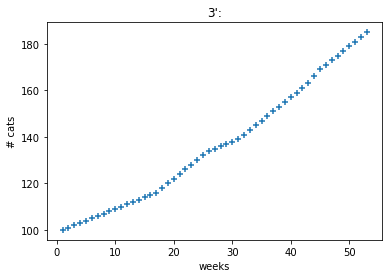

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(W,N ,marker='+')
axes.set_xlabel('weeks')
axes.set_ylabel('# cats')
axes.set_title('3\':')

plt.show()

## CNR
We introduce neuters. Assuming that funding remains constant, a CNR program will be able to neuter a constant amount of cats every week.

In [21]:
t = 52*1 # 52 weeks * years
n0 = 100 # initial cat population
nl = 1.5 # number of litters per year
nk = 3 # number of kittens per litter who survive to adulthood
nc = nk * nl / 52 # number of new cats each pregnant cat produces every week

rd = .05 # percent of cats that die every year
    
# A CNR program with finite, approximately constant funding
nn = 10 # number of cats neutered per week
Nn = [0] # list of population of neutered cats every week

N = [n0] # list of cat population every week
W = [1] # week index
for i in range(t):
    nnb = nn # number of cats neutered this week
    nnd = int(rd * Nn[i]) # integer number of neutered cats that died this week
    dNn = nnb - nnd # number of newly neutered cats this week
    Nn.append(Nn[i] + dNn)
    if Nn[i+1] > N[i] : Nn[i+1] = N[i] # success for CNR
    
    np = (N[i] - Nn[i+1])/2 # number of pregnant cats this week
                            # calculated from the virile population
    nb = int(np * nc) # integer number of cats born this week
    nd = int(rd * N[i]) # integer number of cats that died this week
    dN = nb - nd # change in cat population this week
    N.append(N[i] + dN)
    W.append(W[i] + 1)
    
# print(N)

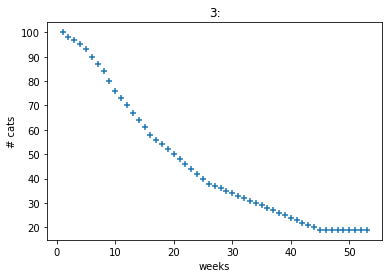

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(W,N ,marker='+')
axes.set_xlabel('weeks')
axes.set_ylabel('# cats')
axes.set_title('3:')

plt.show()

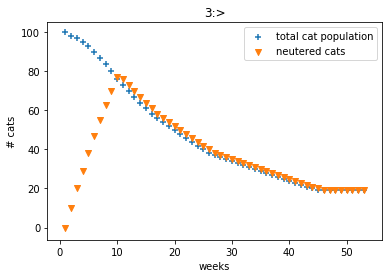

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(W,N ,marker='+')
axes.scatter(W,Nn ,marker='v')
axes.set_xlabel('weeks')
axes.set_ylabel('# cats')
axes.set_title('3:>')
axes.legend(['total cat population','neutered cats'])

plt.show()

## A More Realistic Model
The Humane Society of Huron Valley gives some figures for their T(C)NR program.
* 1049 cats neutered per year $\to$ ~20 per week
* Stray/abandoned kittens dropped by 36% over ~10 years

MSU's Animal Legal and Historical Center and the American Bird Conservancy give some figures on feral cat populations.
* life expectancy: less than 2 years
* size of the colony depends on food source
* cats may have up to 3 litters per year
* 3-6 kittens per litter may survive to adulthood

In [30]:
t = 52*1 # 52 weeks * years
n0 = 600 # initial cat population
         # try 100, 300, 600
nl = 3 # number of litters per year
nk = 6 # number of kittens per litter who survive to adulthood
nc = nk * nl / 52 # number of new cats each pregnant cat produces every week

rd = .1 # percent of cats which die every year
    
# A CNR program with finite, approximately constant funding
nn = 20 # number of cats neutered per week
Nn = [0] # list of population of neutered cats every week

N = [n0] # list of cat population every week
W = [1] # week index
for i in range(t):
    nnb = nn # number of cats neutered this week
    nnd = int(rd * Nn[i]) # integer number of neutered cats which died this week
    dNn = nnb - nnd # number of newly neutered cats this week
    Nn.append(Nn[i] + dNn)
    if Nn[i+1] > N[i] : Nn[i+1] = N[i] # success for CNR
    
    np = (N[i] - Nn[i+1])/2 # number of pregnant cats this week
                            # calculated from the virile population
    nb = int(np * nc) # integer number of cats born this week
    nd = int(rd * N[i]) # integer number of cats which died this week
    dN = nb - nd # change in cat population this week
    N.append(N[i] + dN)
    W.append(W[i] + 1)
    
# print(N)

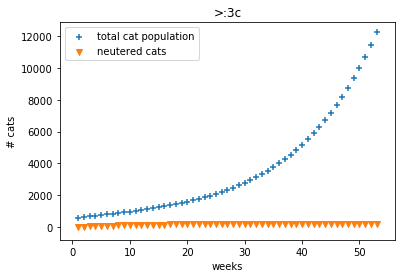

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(W,N ,marker='+')
axes.scatter(W,Nn ,marker='v')
axes.set_xlabel('weeks')
axes.set_ylabel('# cats')
axes.set_title('>:3c')
axes.legend(['total cat population','neutered cats'])

plt.show()

# Conclusions?

It's very difficult to control large colonies with ample food sources, such as are represented by these simple models. Many TNR programs include a component of care and feeding for colonies in the interests of animal welfare, but in a colony that's not under control this could increase the population of the colony beyond managable levels. Since cats continue to hunt even when they're not hungry, any population of feral cats presents a danger to local wildlife.

* CNR programs need an agressive strategy to control colonies before they become too large.
* CNR programs that provide care for colonies need to ensure that they are caring for *neutered* cats- providing feeding and vaccinations for virile cats may run counter to the aims of the program.
* CNR programs can work in conjunction with shelters to remove kittens from the colony when they're young enough to be domesticated and live with humans.
* Managed colonies can be complemented by dedicated feral cat sanctuaries.